In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
books_df=pd.read_csv("C:\\Users\\Priya\\Downloads\\books.csv")
ratings_df=pd.read_csv("C:\\Users\\Priya\\Downloads\\ratings.csv")
book_tags_df=pd.read_csv("C:\\Users\\Priya\\Downloads\\book_tags.csv")

In [24]:
#How many books do not have an original title [books.csv]
books_without_original_title = books_df['original_title'].isnull().sum()
print("Number of books without an original title:", books_without_original_title)

Number of books without an original title: 0


In [25]:
books_df = books_df.dropna(subset=['original_title'])
books_with_title = books_df['book_id'].tolist()
book_tags_df = book_tags_df[book_tags_df['goodreads_book_id'].isin(books_with_title)]
ratings_df = ratings_df[ratings_df['book_id'].isin(books_with_title)]
unique_books_count = len(books_df['book_id'].unique())
print("Number of unique books after cleaning:", unique_books_count)

Number of unique books after cleaning: 363


In [26]:
unique_users_count = ratings_df['user_id'].nunique()

# Print the result
print("Number of unique users in the dataset:", unique_users_count)

Number of unique users in the dataset: 40573


In [27]:
unique_tags_count = book_tags_df['tag_id'].nunique()
print("Number of unique tags in the dataset:", unique_tags_count)

Number of unique tags in the dataset: 100


In [28]:
tag_counts = book_tags_df.groupby('tag_id').size()
most_frequent_tag_id = tag_counts.idxmax()
print("The most frequently used tag_id:", most_frequent_tag_id)

The most frequently used tag_id: 199


In [29]:
#Which book (title) has the most number of counts of tags given by the user [book_tags.csv,books.csv] 
merged_df = pd.merge(book_tags_df, books_df, left_on='goodreads_book_id', right_on='book_id', how='inner')
tag_counts_by_book = merged_df.groupby('title')['tag_id'].count()
most_tagged_book = tag_counts_by_book.idxmax()
print("The book with the most number of counts of tags:", most_tagged_book)

The book with the most number of counts of tags: Beyond Band of Brothers: The War Memoirs of Major Dick Winters


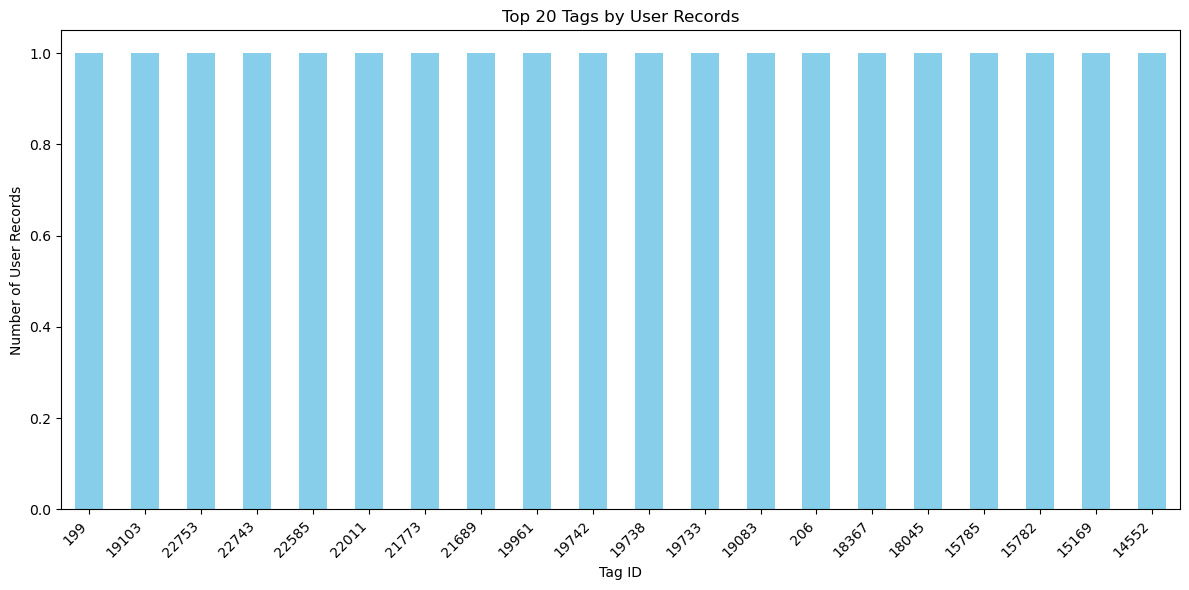

In [30]:
#Plot a bar chart with top 20 unique tags in descending order of ‘user records’ (the number of users tagged the given tag_id with the goodreads_book_id) [book_tags.csv]
tag_user_counts = book_tags_df.groupby('tag_id')['goodreads_book_id'].nunique()
top_tags = tag_user_counts.sort_values(ascending=False).head(20)
plt.figure(figsize=(12, 6))
top_tags.plot(kind='bar', color='skyblue')
plt.title('Top 20 Tags by User Records')
plt.xlabel('Tag ID')
plt.ylabel('Number of User Records')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()